<a href="https://colab.research.google.com/github/Gawthaman/ANN/blob/main/ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import torch

data = [[1,2,3,4],[3,4,5,6]]
x_data = torch.tensor(data)
x_rand = torch.rand_like(x_data, dtype=torch.float)
print (x_rand)

tensor([[0.3215, 0.6083, 0.9778, 0.2926],
        [0.9490, 0.4161, 0.7448, 0.5533]])


In [7]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class Model (nn.Module):
  def __init__ (self, in_features = 4, h1 = 8, h2 = 9, out_features = 3):
    super().__init__()
    self.fc1 = nn.Linear(in_features, h1)
    self.fc2 = nn.Linear(h1, h2)
    self.out = nn.Linear(h2, out_features)

  def forward (self, x):
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.out(x)

    return x

In [9]:
torch.manual_seed(41)
model = Model()

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [15]:
url = 'https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv'
my_df = pd.read_csv(url)

In [24]:
my_df['species'] = my_df['species'].replace('setosa', 0.0)
my_df['species'] = my_df['species'].replace('versicolor', 1.0)
my_df['species'] = my_df['species'].replace('virginica', 2.0)

In [26]:
X = my_df.drop('species', axis = 1)
y = my_df['species']

In [27]:
X = X.values
y = y.values

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
X_train,X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=41)

In [30]:
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [31]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = 0.01)

In [32]:
epochs = 100
losses = []
for i in range(epochs):
  y_pred = model.forward(X_train)
  loss = criterion(y_pred, y_train)
  losses.append(loss.detach().numpy())

  if i % 10 == 0:
    print(f'Epoch: {i} Loss: {loss}')
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

Epoch: 0 Loss: 1.1251550912857056
Epoch: 10 Loss: 1.0096259117126465
Epoch: 20 Loss: 0.8157405853271484
Epoch: 30 Loss: 0.585706353187561
Epoch: 40 Loss: 0.3999636471271515
Epoch: 50 Loss: 0.26768800616264343
Epoch: 60 Loss: 0.17942361533641815
Epoch: 70 Loss: 0.12151690572500229
Epoch: 80 Loss: 0.0860118493437767
Epoch: 90 Loss: 0.06520850956439972


Text(0.5, 0, 'Epoch')

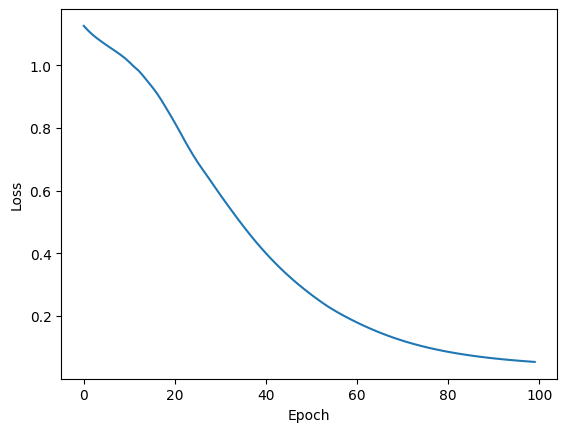

In [33]:
plt.plot(range(epochs), losses)
plt.ylabel('Loss')
plt.xlabel('Epoch')

In [34]:
with torch.no_grad():
  y_eval = model.forward(X_test)
  loss = criterion(y_eval, y_test)

In [37]:
correct = 0
with torch.no_grad():
  for i, data in enumerate(X_test):
    y_val = model.forward(data)

    print (f'{i+1}.) {str(y_val)}')
    if y_val.argmax().item() ==  y_test[i]:
      correct += 1
print (f'We got {correct} correct')

1.) tensor([-5.8760,  4.4628,  6.5124])
2.) tensor([-7.5436,  4.1670,  9.7255])
3.) tensor([-8.4504,  5.1271, 10.1987])
4.) tensor([-4.3398,  5.6267,  2.5608])
5.) tensor([-7.1825,  4.8754,  8.2992])
6.) tensor([-3.3974,  5.3463,  1.2803])
7.) tensor([-5.9231,  4.9822,  5.9997])
8.) tensor([-4.2881,  5.7003,  2.3889])
9.) tensor([-6.5356,  4.9257,  7.1260])
10.) tensor([-8.0509,  4.4129, 10.3286])
11.) tensor([-5.6762,  4.9500,  5.6215])
12.) tensor([ 4.5662, -2.2476, -2.8911])
13.) tensor([ 4.2571, -1.9967, -2.7330])
14.) tensor([-2.1108,  4.0515,  0.5799])
15.) tensor([ 3.4575, -1.2098, -2.3514])
16.) tensor([-5.4724,  5.1165,  5.0934])
17.) tensor([ 4.0557, -1.7949, -2.6492])
18.) tensor([-5.8075,  4.6053,  6.2458])
19.) tensor([ 4.4343, -2.1392, -2.8242])
20.) tensor([ 3.4528, -1.2514, -2.3660])
21.) tensor([-2.6189,  4.5619,  0.8574])
22.) tensor([-7.7412,  4.7377,  9.4199])
23.) tensor([ 3.5744, -1.3221, -2.4135])
24.) tensor([ 4.5365, -2.2383, -2.8684])
25.) tensor([-2.6579,  4.